HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17021765680765971692\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-3592666096661311204\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17021765680765971692\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

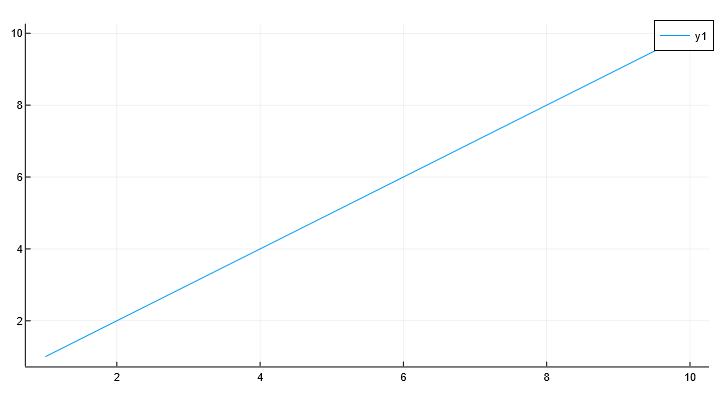

In [1]:
using Plots
plotlyjs()
plot(1:10)

In [2]:
include("../src/test.jl")

In [3]:
function plotChain!(P::PolygonalChain2,c)
    arr = toArray(P)
    scatter!(arr[:,1],arr[:,2],arr[:,3],color=c)
    plot!(arr[:,1],arr[:,2],arr[:,3],color="black")
end

plotChain! (generic function with 1 method)

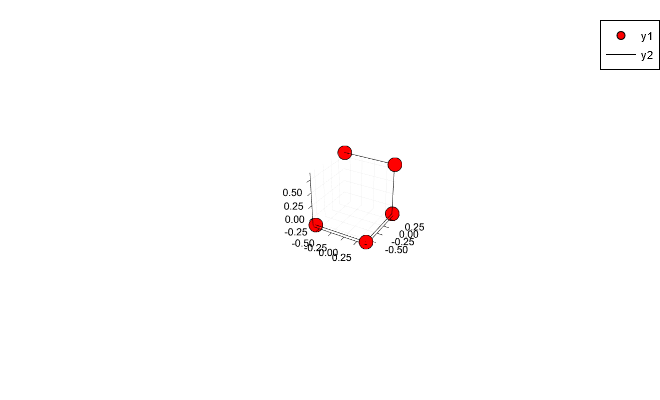

In [4]:
a = Point3D(0.0,0.0,0.0)
b = Point3D(1.0,0.0,0.0)
c = Point3D(1.0,1.0,0.0)
d = Point3D(1.0,1.0,1.0)
e = Point3D(0.0,1.0,1.0)
P = PolygonalChain2([a,b,c,d,e])
#dihedralRotate!(P,2,pi/4)
centerChain!(P)
plot()
plotChain!(centerChain(P),"red")

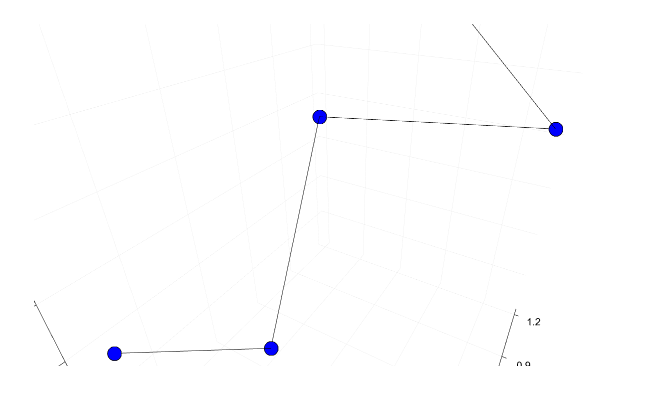

In [7]:
randomRot = rotation(2*pi*rand(),unitVector(Point3D()))
c = Point3D()
newArr = [randomRot*p + c + 0.3*Point3D() for p in P.vertices]
Q = PolygonalChain2(newArr)
plot(legend=false)
plotChain!(Q,"blue")

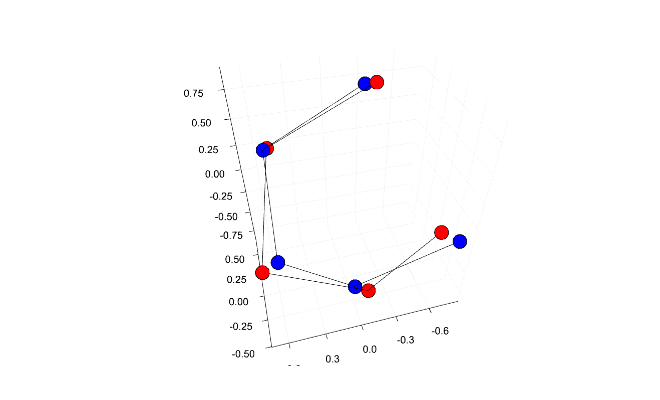

In [9]:
P = centerChain(P)
Q = centerChain(Q)
mat = optimalRotation(P,Q)
S = PolygonalChain2([mat*p for p in P.vertices])
p = plot(legend=false)
plotChain!(S,"blue")
plotChain!(Q,"red")

In [13]:
simpleRmsd(P,Q)

0.8395819045182941

In [12]:
overlapedRmsd(P,Q)

0.13422579873787416